<a href="https://colab.research.google.com/github/colvertG/Taller_GOES16/blob/main/Taller_GOES16_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Detección y Análisis de Incendios Forestales con Imágenes GOES-16

## Introducción y procesamiento de datos de GOES-16

### 1. Introducción a GOES-16

Las órbitas satelitales se pueden clasificar en 3 tipos:
- LEO (Low Earth Orbit) es una órbita terrestre baja, de 500 a 900km, sus principales características son una resolución espacial mediana y una baja resolución temporal. Ejemplos: Suomi-NPP y NOAA-20
- MEO (Medium Earth Orbit) es una órbita terrestre mediana, a una altitud entre 5,000 a 12,000km, su principal uso ha sido para sistemas ó constelaciones de satélites de posicionamiento geográfico. Ejemplos: GPS, GLONASS, Galileo
- GEO (Geosynchronous Orbit) es una órbita terrestre alta, estos satélites orbitan a una altitud promedio de 35,000km y parecen permanecen fijos, se mueven acompañando a la Tierra en su movimiento. Su principal objetivo es la observación meteorológica y tiene la
característica de tener una alta resolución temporal y baja resolución espacial. Ejemplos: GOES, Meteosat, Himawari, etc.

Primer imagen en color de la Tierra, una composición de imágenes tomadas en 1967 por el ATS-3.

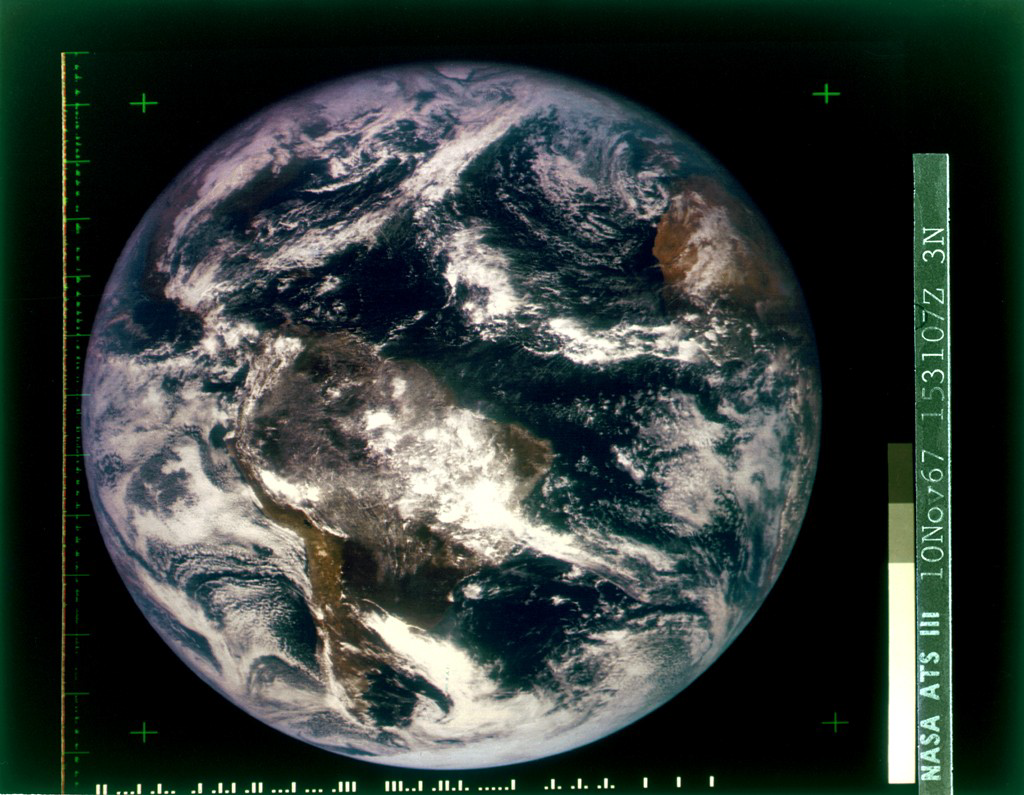

Satélite Geoestacionario Operacional Ambiental GOES-16 o GOES-East (Geostationary Operational Environmental Satellite) es un satélite meteorológico geoestacionario operado por la Administración Nacional Oceánica y Atmosférica (NOAA) de los Estados Unidos. Fue lanzado al espacio en noviembre de 2016 y es el primer satélite de la serie GOES-R, cubre principalmente la región de América del Norte, Centroamérica y Sudamérica, así como el Océano Atlántico hasta la costa occidental de África. La región de cobertura de GOES-16 se extiende desde aproximadamente 0 grados de longitud hasta 150 grados de longitud oeste y desde el Círculo Ártico hasta el extremo sur de América del Sur, lo que incluye gran parte de los Estados Unidos, México, Centroamérica, Sudamérica y el Océano Atlántico.


- La serie GOES-R es un programa que consiste de 4 naves espaciales con las mismas características y sensores, GOES-R (16), GOES-S (17) lanzado en 2018, GOES-T (18) lanzado el 1ro de marzo de 2022 y GOES-U (19) lanzado el 25 de junio de 2024 y se espera que GOES-19 entre en operación completa en abril de 2025 como el nuevo satélite GOES-East, reemplazando a GOES-16, que pasará a ser el satélite de respaldo en órbita.


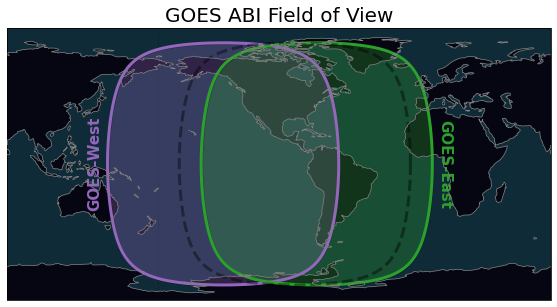

Instrumentos a bordo de GOES-16:

| **Clasificación**   | **Instrumento** | **Nombre Completo**                            | **Descripción**                                                                                                                                                                                                                    |
|---------------------|-----------------|------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **NADIR POINTING**   | ABI             | Advanced Baseline Imager                       | El sensor ABI es un radiómetro multiespectral de 16 bandas de última generación, con bandas espectrales que cubren las porciones visibles, infrarrojas cercanas e infrarrojo del espectro electromagnético.                         |
|                     | GLM             | Geostationary Lightning Mapper                 | Es un detector transitorio óptico de infrarrojo cercano de un solo canal que puede detectar los cambios momentáneos en una escena óptica, lo que indica la presencia de rayos. Es el primer mapeador de rayos operacional en órbita geoestacionaria. |
| **SOLAR POINTING**   | SUVI            | Solar Ultraviolet Imager                       | Es un telescopio que monitorea el sol en el rango de longitud de onda ultravioleta. Observa y caracteriza regiones activas complejas del sol, erupciones solares y las erupciones de filamentos solares que pueden dar lugar a eyecciones de masa coronal. |
|                     | EXIS            | Extreme Ultraviolet and X-ray Irradiance Sensors| Es un sensor de irradiancia ultravioleta extrema y de rayos X. Es capaz de detectar erupciones solares que podrían interrumpir las comunicaciones y reducir la precisión de navegación, afectando a los satélites, las líneas aéreas de gran altitud y las redes eléctricas en la Tierra. |
| **IN-SITU**         | MAG             | Magnetometer                                   | El magnetómetro proporciona mediciones del campo magnético del entorno espacial que controla la dinámica de las partículas cargadas en la región exterior de la magnetosfera. Estas partículas pueden ser peligrosas para las naves espaciales y los vuelos espaciales humanos. |
|                     | SEISS           | Space Environment In-Situ Suite                | Este instrumento está compuesto por cuatro sensores que monitorean los flujos de protones, electrones y iones pesados en la magnetosfera con el fin de evaluar el riesgo de descarga electrostática y el peligro de radiación para los astronautas y los satélites.              |


Bandas del sensor ABI, resolución espectral, espacial y radiométrica:

| **Número de banda** | **Longitud de onda central (µm)** | **FWHM* al 50% mínimo** | **FWHM* al 50% máximo** | **Resolución espacial al nadir [km]** | **Tipo**            | **Nombre**                              | **Resolución radiométrica [bits]** |
|---------------------|----------------------------------|-------------------------|-------------------------|---------------------------------------|-------------------|----------------------------------------|-----------------------------------|
| 1                   | 0.47                             | 0.45                    | 0.49                    | 1                                     | Visible            | Azul                                   | 12                                |
| 2                   | 0.64                             | 0.6                     | 0.68                    | 0.5                                   | Visible            | Roja                                   | 12                                |
| 3                   | 0.87                             | 0.847                   | 0.882                   | 1                                     | Infrarrojo cercano | Veggie                                 | 12                                |
| 4                   | 1.38                             | 1.366                   | 1.384                   | 2                                     | Infrarrojo cercano | Cirrus                                 | 12                                |
| 5                   | 1.61                             | 1.59                    | 1.63                    | 2                                     | Infrarrojo cercano | Nieve/Hielo                             | 12                                |
| 6                   | 2.25                             | 2.22                    | 2.27                    | 2                                     | Infrarrojo cercano | Tamaño de las partículas de la nube    | 12                                |
| 7                   | 3.89                             | 3.84                    | 3.94                    | 2                                     | Infrarrojo térmico | Ventana de onda corta                  | 14                                |
| 8                   | 6.17                             | 5.99                    | 6.59                    | 2                                     | Infrarrojo térmico | Vapor de agua de nivel superior        | 12                                |
| 9                   | 6.93                             | 6.72                    | 7.14                    | 2                                     | Infrarrojo térmico | Vapor de agua de nivel medio           | 12                                |
| 10                  | 7.34                             | 7.24                    | 7.44                    | 2                                     | Infrarrojo térmico | Vapor de agua de nivel inferior        | 12                                |
| 11                  | 8.44                             | 8.3                     | 8.58                    | 2                                     | Infrarrojo térmico | Fase superior de la nube               | 12                                |
| 12                  | 9.61                             | 9.42                    | 9.8                     | 2                                     | Infrarrojo térmico | Ozono                                  | 12                                |
| 13                  | 10.35                            | 10.1                    | 10.6                    | 2                                     | Infrarrojo térmico | Ventana de onda larga "limpia"         | 12                                |
| 14                  | 11.19                            | 10.8                    | 11.6                    | 2                                     | Infrarrojo térmico | Ventana de onda larga                  | 12                                |
| 15                  | 12.27                            | 11.83                   | 12.75                   | 2                                     | Infrarrojo térmico | Ventana de onda larga "sucia"          | 12                                |
| 16                  | 13.27                            | 12.99                   | 13.56                   | 2                                     | Infrarrojo térmico | Onda larga de CO2                      | 12                                |

Los datos de ABI son puestos a disposición del público en un nivel de procesamiento “Level 1b (L1b)” donde la información de los pixeles ya
está en unidades de radiancia, de estos datos se obtiene una serie de productos“Level 2 (L2)”, como lo es el producto “Cloud and Moisture Imagery Product (**CMIP**)”, donde se generan las 16 bandas en unidades de reflectancia para las bandas (1-6) y temperatura de brillo para las bandas (7-16).

Características y rangos válidos del producto CMIP:

| Número de banda | Longitud de onda central | Valor de relleno | Rango válido (en unidades de cantidad física) |       |
|-----------------|--------------------------|------------------|-----------------------------------------------|-------|
|                 |                          |                  | Mínimo                                        | Máximo|
| 1               | 0.47                     | 65535            | 0                                             | 1.3   |
| 2               | 0.64                     | 65535            | 0                                             | 1.3   |
| 3               | 0.87                     | 65535            | 0                                             | 1.3   |
| 4               | 1.38                     | 65535            | 0                                             | 1.3   |
| 5               | 1.61                     | 65535            | 0                                             | 1.3   |
| 6               | 2.25                     | 65535            | 0                                             | 1.3   |
| 7               | 3.89                     | 65535            | 197.31                                        | 411.86|
| 8               | 6.17                     | 65535            | 138.05                                        | 311.06|
| 9               | 6.93                     | 65535            | 137.7                                         | 311.08|
| 10              | 7.34                     | 65535            | 126.91                                        | 341.2 |
| 11              | 8.44                     | 65535            | 127.69                                        | 341.3 |
| 12              | 9.61                     | 65535            | 117.49                                        | 311.06|
| 13              | 10.33                    | 65535            | 89.62                                         | 341.27|
| 14              | 11.19                    | 65535            | 90.19                                         | 341.28|
| 15              | 12.27                    | 65535            | 97.38                                         | 341.28|
| 16              | 13.27                    | 65535            | 92.7                                          | 318.26|


Escenas de escaneo de ABI:

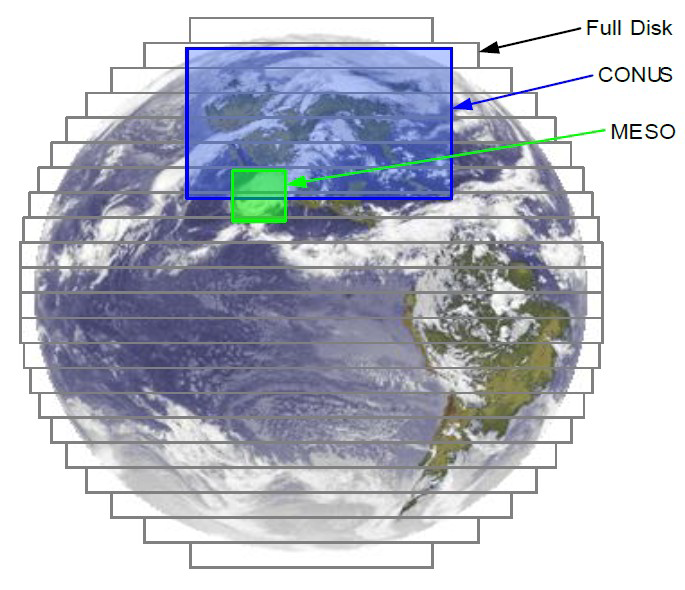

Modos de escaneo de ABI y resolución temporal de ABI:

| Modo de escaneo      | Escena     | Resolución temporal |
|----------------------|------------|---------------------|
| **Modo 3**           | FullDisk   | 15 min              |
|                      | CONUS      | 5 min               |
|                      | Mesoescala | 30 seg              |
| **Modo 4 ó continuo**| FullDisk   | 5 min               |
|                      | CONUS      | N/A                 |
|                      | Mesoescala | N/A                 |
| **Modo 6 ó flexible**| FullDisk   | 10 min              |
|                      | CONUS      | 5 min               |
|                      | Mesoescala | 30 seg              |

Desde el 2 de abril de 2019, a las 16:00 UTC, el sensor ABI de GOES-16 comenzó a
funcionar en el modo flexible de 10 minutos para FullDisk (Modo 6)

**Características de cada banda de ABI:**

- La banda 1 del visible de 0.47μm, o “Azul” sirve particularmente para monitorear aerosoles, proporciona observaciones diurnas de polvo, neblina, humo y nubes. Es más sensible a los aerosoles porque esa longitud de onda está en una parte del espectro electromagnético donde la dispersión atmosférica de Rayleigh en cielo despejado es más frecuente. Las señales de humo y polvo en esta banda son más evidentes cuando el sol está bajo en el cielo, como el amanecer y el atardecer. Hay una transmitancia disminuida (dispersión incrementada) a longitudes de onda visibles más cortas. Esto es importante porque los filamentos delgados de humo, particularmente los aerosoles pequeños podrían no ser detectables a partir de bandas de longitud de onda más largas. Las columnas de humo de incendios forestales se observan claramente en esta banda si el cielo está despejado.

- La banda 2 del visible "Roja" en 0,64μm tiene la mejor resolución espacial (0,5 km al nadir) de
todas las bandas ABI. Las nubes y el polvo espeso se ven similares a la banda 1. Más allá de los
aerosoles, las bandas visibles tienen multitud de aplicaciones. Son ideales para identificar
características a pequeña escala, como la niebla del río, los bordes de la niebla, o las nubes de
tipo cúmulos durante el día. La banda de 64μm también se ha utilizado durante el día para monitorear la capa de nieve y hielo, ayudar a detectar cenizas volcánicas y analizar huracanes y
tormentas de invierno

- La banda 3 de 0,86μm o “Veggie” es muy sensible a la vegetación y detecta
nubes diurnas, niebla y algunos aerosoles. La vegetación, en general es más reflectante (es decir,
más brillante) en esta banda que en las bandas visibles. Esto puede hacer que sea más difícil
discernir entre nubes o aerosoles y la superficie terrestre subyacente. Esta banda
tiene el apodo de "Veggie" porque es sensible a los cambios en la vegetación. También se utiliza
para calcular el índice de vegetación de diferencia normalizada (NDVI por sus siglas en ingles). Esta banda detecta energía en una parte del espectro electromagnético donde la
vegetación es más reflectante que la tierra, por lo tanto, las
cicatrices de quemaduras también son perceptibles en la banda "Veggie" debido al contraste de
reflectancia de la tierra con la vegetación. El conocimiento de dónde existen las cicatrices de
quemaduras ayuda a determinar cómo se puede propagar un incendio y finalmente, esta banda es
esencial para simular una banda "verde" que se necesita para una imagen en color natural.

- La banda 7 de 3.9μm detecta la radiación IR terrestre emitida por la Tierra como la radiación
solar reflejada durante el día, su longitud de onda más
corta es más sensible a la temperatura que las bandas del infrarrojo de longitud de onda más larga
y en particular es más sensible a los incendios forestales, también se utiliza para identificar la niebla y las nubes bajas en la noche, localizar islas de calor urbano, detectar
cenizas volcánicas, estimar las temperaturas de la superficie, distinguir entre masas de aire y
discriminar entre tamaños de cristales de hielo durante el día. Durante la noche, la información
de la temperatura es bastante confiable, pero durante el día incluye reflejos solares
principalmente en suelo desnudo y en algunos tipos de nubes, las nubes de agua y las nubes altas
con cristales de hielo muy pequeños reflejan la radiación solar y, por lo tanto, se representan en
valores de temperatura de brillo cálidos, los cristales de hielo grandes no reflejan bien la
radiación solar de 3.9μm y por lo tanto muestran temperaturas de brillo más frías. La necesidad
de detectar tanto los incendios calientes y distinguir las características de las nubes frías requiere
que cada pixel tenga la capacidad de capturar un rango más amplio de valores potenciales, por
esta razón, las imágenes de la banda de 3.9μm tienen una resolución radiométrica de 14 bits, lo
que permite 16384 valores discretos por pixel con un valor máximo de 411K, o 138°C, este es el
rango más grande de todas las bandas del ABI.

- La banda 14 de GOES-16, que tiene una longitud de onda central de aproximadamente 11.19 μm, es parte del espectro infrarrojo térmico y está diseñada principalmente para detectar la radiación infrarroja terrestre emitida por la superficie terrestre, las nubes y la atmósfera. Esta banda es conocida como la "banda de ventana infrarroja" porque la longitud de onda de 11.19 μm se encuentra en una "ventana" atmosférica, lo que significa que la radiación en esta longitud de onda atraviesa la atmósfera terrestre con relativamente poca interferencia por parte de los gases atmosféricos, como el vapor de agua o el dióxido de carbono.

La combinación de las bandas 7 (3.9 μm) y 14 (11.19 μm) en GOES-16 es comúnmente utilizada detección de incendios forestales: La banda 7 (3.9 μm) es muy sensible a las altas temperaturas, lo que la hace excelente para detectar puntos de calor como incendios activos. La banda 14, al no ser tan sensible a la radiación de alta temperatura, se utiliza en conjunto para confirmar la detección del incendio y minimizar las falsas alarmas provocadas por reflejos solares o áreas calientes no relacionadas con incendios.

Resumen de cada banda: http://www.ptolomeo.unam.mx:8080/xmlui/bitstream/handle/RepoFi/17909/Tesis.pdf?sequence=1&isAllowed=y



**Compuesto de color verdadero:**
Para generar imágenes RGB en color verdadero se requiere de las bandas roja (0.64 μm), verde (0.55 μm) y azul (0.47 μm), pero en ABI no cuenta con la banda verde (0.55 μm), sin embargo, posee la banda de veggie (0.86 μm) que, cuando se combina proporcionalmente con las bandas roja (0.64 μm) y azul (0.47 μm), puede generar una banda similar al verde como una aproximación, teniendo en cuenta que este enfoque es una aproximación de primer orden; no reemplaza el contenido de información de la banda verde que falta. A través de la experimentación, la proporción que produjo resultados razonables fue:

$$Falso\ Verde = 0.45 \cdot Roja + 0.10 \cdot Veggie + 0.45 \cdot Azul \quad$$

$$Color\ Verdadero = (\text{Banda 2},\ Falso\ Verde,\ \text{Banda 1})$$


[Guias de compuestos y productos oficiales de GOES-16](https://rammb2.cira.colostate.edu/training/visit/quick_reference/#tab17)

**Los archivos originales están en formato NetCDF. Por ejemplo:**

OR_ABI-L1b-RadM1-M3C01_G16_s20172511100550_e20172511101007_c20172511101048.nc

- OR - Los datos son operacionales y en tiempo real.
- ABI-L1b-RadM1 - Es el producto, con el dominio de mesoescala 1. C es para CONUS (Estados Unidos continental), F es para disco completo (full disk), y M2 es para Mesoescala 2.
- M3C01 - El modo es 3 y el canal es 01.
- G16 - Es para GOES-16 (G17 es para GOES-17 y G18 para GOES-18).
- s20172511100550 - Hora de inicio del escaneo. Se desglosa como sAAAAJJJHHMMSSm: año, día del año, hora, minuto, segundo, décima de segundo.
- e20172511101007 - Hora de fin del escaneo. Se desglosa igual que la hora de inicio.
- c20172511101048 - Hora de creación del archivo de escaneo. Igual formato: sAAAAJJJHHMMSSm: año, día del año, hora, minuto, segundo, décima de segundo.
- .nc - Este es un archivo NetCDF.

### 2.	Manejo y Procesamiento de Imágenes de GOES-16 (ABI)

In [ ]:
# Instalar librerías
!pip install goes2go

In [1]:
 # Importar librerías
from goes2go import GOES

c:\Users\colve\anaconda3\envs\entornoCPU\Lib\site-packages\goes2go\data.py:522: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1H")),
c:\Users\colve\anaconda3\envs\entornoCPU\Lib\site-packages\goes2go\NEW.py:188: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1H")),


In [2]:
# Crea una instancia del objeto GOES con los siguientes parámetros:
# - satellite=16: Especifica que se utilizará el satélite GOES-16.
# - product="ABI-L2-MCMIP": Indica que se utilizará el producto "ABI-L2-MCMIP".
# - domain='C': Define el dominio de la imagen como 'C' (Conus, que cubre la mayor parte de América del Norte).
G = GOES(satellite=16, product="ABI-L2-MCMIP", domain='C')
# Guia completa de productos disponibles:
# https://github.com/blaylockbk/goes2go/blob/main/goes2go/product_table.txt

In [3]:
# Obtiene el dataset más reciente del satélite GOES-16.
ds = G.latest()

c:\Users\colve\anaconda3\envs\entornoCPU\Lib\site-packages\goes2go\data.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  DATES = pd.date_range(f"{start:%Y-%m-%d %H:00}", f"{end:%Y-%m-%d %H:00}", freq="1H")


📦 Finished downloading [1] files to [C:\Users\colve\data\noaa-goes16\ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [24]:
print(ds.attrs)

{'naming_authority': 'gov.nesdis.noaa', 'Conventions': 'CF-1.7', 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0', 'standard_name_vocabulary': 'CF Standard Name Table (v35, 20 July 2016)', 'institution': 'DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services', 'project': 'GOES', 'production_site': 'NSOF', 'production_environment': 'OE', 'spatial_resolution': '2km at nadir', 'orbital_slot': 'GOES-East', 'platform_ID': 'G16', 'instrument_type': 'GOES-R Series Advanced Baseline Imager (ABI)', 'scene_id': 'CONUS', 'instrument_ID': 'FM1', 'iso_series_metadata_id': '8c9e8150-3692-11e3-aa6e-0800200c9a66', 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0', 'title': 'ABI L2 Cloud and Moisture Imagery', 'summary': 'Multiple reflectance and emissive channel Cloud and Moisture Imagery Products are digital maps of clouds, mois